Import data from matlab files, only keep full sessions

In [88]:
import scipy.io
from pathlib import Path

# Directory containing MATLAB files
mat_dir = 'E:/MAZE/data_p/populationAnalysis/MACRO/BEHAV_TRIALS'

# List to store all X_rep3 matrices
all_x_rep3 = []
all_x_rep1 = []

# Dictionaries to store data with filenames for reference
x_rep3_by_file = {}
x_rep1_by_file = {}
skipped_files = []

# Dictionary to store data with filenames for reference
data_by_file = {}

def load_and_extract(filepath):
    """
    Load MATLAB file and extract first 24 rows from X_rep3 and X_rep1.
    Returns None if data doesn't have at least 24 rows or has wrong shape.
    """
    try:
        # Load the .mat file
        mat_data = scipy.io.loadmat(filepath)

        # Extract X_rep3 from experienced_data_structure
        exp_data_struct = mat_data['experienced_data_structure']
        X_rep3 = exp_data_struct['X_rep3'][0, 0]

        # Extract X_rep1 from explore_data_structure
        explore_data_struct = mat_data['explore_data_structure']
        X_rep1 = explore_data_struct['X_rep1'][0, 0]

        # Check if both have at least 24 rows
        if X_rep3.shape[0] < 24:
            print(f"  ⚠ X_rep3 has only {X_rep3.shape[0]} rows (need 24)")
            return None, None

        if X_rep1.shape[0] < 24:
            print(f"  ⚠ X_rep1 has only {X_rep1.shape[0]} rows (need 24)")
            return None, None

        # Check if both have the same number of columns
        if X_rep3.shape[1] != X_rep1.shape[1]:
            print(f"  ⚠ Shape mismatch: X_rep3 {X_rep3.shape} vs X_rep1 {X_rep1.shape}")
            return None, None

        # Take only the first 24 rows
        x_rep3_subset = X_rep3[:24]
        x_rep1_subset = X_rep1[:24]


         # Print shapes for verification
        print(f"✅ X_rep3_subset shape: {x_rep3_subset.shape}")
        print(f"✅ X_rep1_subset shape: {x_rep1_subset.shape}")

        return x_rep3_subset, x_rep1_subset

    except KeyError as e:
        print(f"  ✗ Missing expected structure: {e}")
        return None, None
    except Exception as e:
        print(f"  ✗ Error: {e}")
        return None, None

# Get all .mat files
mat_files = sorted(Path(mat_dir).glob('*data_structure_goalDecode.mat'))
print(f"Found {len(mat_files)} .mat files\n")

# Loop through files and extract both variables
for mat_file in mat_files:
    print(f"Processing: {mat_file.name}")

    X_rep3, X_rep1 = load_and_extract(mat_file)

    if X_rep3 is not None and X_rep1 is not None:
        print(f"  ✓ Extracted X_rep3 with shape: {X_rep3.shape}")
        print(f"  ✓ Extracted X_rep1 with shape: {X_rep1.shape}")

        all_x_rep3.append(X_rep3)
        all_x_rep1.append(X_rep1)

        x_rep3_by_file[mat_file.stem] = X_rep3
        x_rep1_by_file[mat_file.stem] = X_rep1
    else:
        print(f"  ✗ Skipping file due to incompatible shape or missing data")
        skipped_files.append(mat_file.name)
    print()


# Check ALL matrices, not just the first one
print(f"\nTotal files loaded: {len(all_x_rep3)}")
print("\nVerifying all matrix shapes:")
for i, (X_rep3, X_rep1) in enumerate(zip(all_x_rep3, all_x_rep1)):
    print(f"Matrix {i}: X_rep3 = {X_rep3.shape}, X_rep1 = {X_rep1.shape}")

# Check if they're actually all the same or different
unique_shapes_rep3 = set(X.shape for X in all_x_rep3)
unique_shapes_rep1 = set(X.shape for X in all_x_rep1)

print(f"\nUnique X_rep3 shapes: {unique_shapes_rep3}")
print(f"Unique X_rep1 shapes: {unique_shapes_rep1}")


Found 11 .mat files

Processing: da017_1_data_structure_goalDecode.mat
✅ X_rep3_subset shape: (24, 2000, 10)
✅ X_rep1_subset shape: (24, 2000, 10)
  ✓ Extracted X_rep3 with shape: (24, 2000, 10)
  ✓ Extracted X_rep1 with shape: (24, 2000, 10)

Processing: da018_1_data_structure_goalDecode.mat
  ⚠ X_rep1 has only 22 rows (need 24)
  ✗ Skipping file due to incompatible shape or missing data

Processing: da019_1_data_structure_goalDecode.mat
✅ X_rep3_subset shape: (24, 2000, 10)
✅ X_rep1_subset shape: (24, 2000, 10)
  ✓ Extracted X_rep3 with shape: (24, 2000, 10)
  ✓ Extracted X_rep1 with shape: (24, 2000, 10)

Processing: da019_2_data_structure_goalDecode.mat
  ⚠ X_rep1 has only 19 rows (need 24)
  ✗ Skipping file due to incompatible shape or missing data

Processing: da022_1_data_structure_goalDecode.mat
✅ X_rep3_subset shape: (24, 2000, 19)
✅ X_rep1_subset shape: (24, 2000, 19)
  ✓ Extracted X_rep3 with shape: (24, 2000, 19)
  ✓ Extracted X_rep1 with shape: (24, 2000, 19)

Processing: 

In [89]:
print("DEBUGGING - Checking variables before loop:")
print(f"file_names length: {len(file_names)}")
print(f"file_names: {file_names}")
print()
print(f"all_x_rep3 length: {len(all_x_rep3)}")
print(f"all_x_rep1 length: {len(all_x_rep1)}")
print()

# Check if they match
if len(file_names) == len(all_x_rep3) == len(all_x_rep1):
    print("✓ All lists have the same length")
else:
    print("✗ WARNING: List lengths don't match!")

# Check first item
if len(all_x_rep3) > 0:
    print(f"First x_rep3 shape: {all_x_rep3[0].shape}")
    print(f"First x_rep1 shape: {all_x_rep1[0].shape}")
else:
    print("✗ all_x_rep3 is EMPTY!")

print("="*60)

DEBUGGING - Checking variables before loop:
file_names length: 9
file_names: ['da017_1_data_structure_goalDecode', 'da019_1_data_structure_goalDecode', 'da022_1_data_structure_goalDecode', 'da023_1_data_structure_goalDecode', 'da026_1_data_structure_goalDecode', 'da030_1_data_structure_goalDecode', 'da035_1_data_structure_goalDecode', 'ir103_1_data_structure_goalDecode', 'ir106_1_data_structure_goalDecode']

all_x_rep3 length: 9
all_x_rep1 length: 9

✓ All lists have the same length
First x_rep3 shape: (24, 2000, 10)
First x_rep1 shape: (24, 2000, 10)


In [109]:
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.signal import welch
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.integrate import trapezoid

# Define EEG frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gammal': (30, 45),
    'gammam': (45, 100),
    'gammah': (100, 200),
}

# Function to extract bandpower features using Welch's method
def extract_bandpower_features(X, sampling_rate):
    n_samples, n_time, n_channels = X.shape
    features = []

    # Better Welch parameters for EEG
    nperseg = min(256, n_time)  # Adjust if window is shorter
    noverlap = nperseg // 2     # 50% overlap is standard

    for i in range(n_samples):
        sample_features = []

        for ch in range(n_channels):
            # Compute power spectral density
            f, Pxx = welch(X[i, :, ch], fs=sampling_rate,
                          nperseg=nperseg,
                          noverlap=noverlap,
                          window='hamming')  # Hamming window reduces spectral leakage

            # Calculate bandpowers
            band_powers = {}
            for band_name, (low, high) in bands.items():
                idx_band = np.logical_and(f >= low, f <= high)
                band_powers[band_name] = trapezoid(Pxx[idx_band], f[idx_band])

            # Absolute powers
            for power in band_powers.values():
                sample_features.append(power)

            # Log powers (better for ML)
            for power in band_powers.values():
                sample_features.append(np.log10(power + 1e-10))

            # Extract absolute and relative bandpower for each band
            for band_name, (low, high) in bands.items():
                idx_band = np.logical_and(f >= low, f <= high)

           # Log powers (better for ML)
            for power in band_powers.values():
                sample_features.append(np.log10(power + 1e-10))

            # Band ratios (clinically meaningful)
            if band_powers['theta'] > 0:
                sample_features.append(band_powers['alpha'] / band_powers['theta'])  # Alpha/theta
            if band_powers['delta'] > 0:
                sample_features.append(band_powers['theta'] / band_powers['delta'])  # Theta/delta
            if (band_powers['delta'] + band_powers['theta']) > 0:
                sample_features.append(band_powers['beta'] / (band_powers['delta'] + band_powers['theta']))

        features.append(sample_features)

    return np.array(features)


# Parameters
train_size = 16
test_size = 8
window_size_ms = 400  # can be 200, 300, 400, 500
sampling_rate = 1000  # Hz
window_size = int(window_size_ms * sampling_rate / 1000)  # convert ms to samples
step_size = 100  # step size in samples

# Store results for each file
results_per_file = []
accuracy_curves = {}  # Store accuracy vs window start for each file
file_names = list(x_rep3_by_file.keys())
file_count = 0

# Train and test a separate SVM for each file
for i, (file_name, X_rep3, X_rep1) in enumerate(zip(file_names, all_x_rep3, all_x_rep1)):
    print(f"\n{'=' * 60}")
    print(f"File {i + 1}/11: {file_name}")
    print(f"{'=' * 60}")
    file_count += 1
    print(f"First matrix shape: {X_rep3.shape}")  # If numpy array

    # Split each file: first 20 for train, last 4 for test
    # Keep original 3D arrays
    X_rep3_train = X_rep3[:train_size]  # shape: (16, time, channels)
    X_rep3_test = X_rep3[train_size:train_size + test_size]
    X_rep1_train = X_rep1[:train_size]
    X_rep1_test = X_rep1[train_size:train_size + test_size]

    # Combine without flattening
    X_train = np.concatenate([X_rep3_train, X_rep1_train])  # shape: (32, time, channels)
    X_test = np.concatenate([X_rep3_test, X_rep1_test])

    print(f"Training samples: {X_train.shape[0]}, Test samples: {X_test.shape[0]}")

    #Sliding window analysis
    accuracies = []
    window_positions = []

    for start in range(0, 2000 - window_size + 1, step_size):
        end = start + window_size

        # Extract windowed features and flatten
        #X_train_window = X_train[:, start:end, :].reshape(X_train.shape[0], -1)
        #X_test_window = X_test[:, start:end, :].reshape(X_test.shape[0], -1)

        X_train_window = X_train[:, start:end, :]
        X_test_window = X_test[:, start:end, :]

        # Extract frequency-domain features
        X_train_freq = extract_bandpower_features(X_train_window, sampling_rate)
        X_test_freq = extract_bandpower_features(X_test_window, sampling_rate)

        #flatten

        # Standardize features
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train_freq)
        X_test_scaled = scaler.transform(X_test_freq)

        # Train SVM
        svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
        svm.fit(X_train_scaled, y_train)

        # Accuracy
        acc = accuracy_score(y_test, svm.predict(X_test_scaled))
        accuracies.append(acc)
        window_positions.append(start)

    # Save curve for this file
    accuracy_curves[file_name] = {'window_starts': window_positions, 'accuracies': accuracies}

    # Best window summary
    best_idx = np.argmax(accuracies)
    results_per_file.append({
        'file': file_name,
        'best_window': (window_positions[best_idx], window_positions[best_idx] + window_size),
        'best_accuracy': accuracies[best_idx]
    })

# Output summary
print(f"FINAL COUNT: {file_count} files processed")

print(f"Processed {len(results_per_file)} files. Accuracy curves and best windows stored.")




File 1/11: da017_1_data_structure_goalDecode
First matrix shape: (24, 2000, 10)
Training samples: 32, Test samples: 16

File 2/11: da019_1_data_structure_goalDecode
First matrix shape: (24, 2000, 10)
Training samples: 32, Test samples: 16

File 3/11: da022_1_data_structure_goalDecode
First matrix shape: (24, 2000, 19)
Training samples: 32, Test samples: 16

File 4/11: da023_1_data_structure_goalDecode
First matrix shape: (24, 2000, 12)
Training samples: 32, Test samples: 16

File 5/11: da026_1_data_structure_goalDecode
First matrix shape: (24, 2000, 8)
Training samples: 32, Test samples: 16

File 6/11: da030_1_data_structure_goalDecode
First matrix shape: (24, 2000, 15)
Training samples: 32, Test samples: 16

File 7/11: da035_1_data_structure_goalDecode
First matrix shape: (24, 2000, 11)
Training samples: 32, Test samples: 16

File 8/11: ir103_1_data_structure_goalDecode
First matrix shape: (24, 2000, 20)
Training samples: 32, Test samples: 16

File 9/11: ir106_1_data_structure_goalDe

Train every model on 16/24 trials and train on remaining 8 (+cross validation), do this with a sliding window to locate peak information period

In [113]:
# adding cross validation for each time window training/testing
from sklearn.metrics import accuracy_score
import numpy as np
from scipy.signal import welch
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from scipy.integrate import trapezoid
from sklearn.model_selection import StratifiedKFold

# Define EEG frequency bands
bands = {
    'delta': (0.5, 4),
    'theta': (4, 8),
    'alpha': (8, 13),
    'beta': (13, 30),
    'gamma_low': (30, 45),
    'gamma_mid': (45, 100),
    'gamma_high': (100, 200),
}

# Function to extract bandpower features using Welch's method
def extract_bandpower_features(X, sampling_rate):
    n_samples, n_time, n_channels = X.shape
    features = []

    # Better Welch parameters for EEG
    nperseg = min(256, n_time)  # Adjust if window is shorter
    noverlap = nperseg // 2     # 50% overlap is standard

    for i in range(n_samples):
        sample_features = []

        for ch in range(n_channels):
            # Compute power spectral density
            f, Pxx = welch(X[i, :, ch], fs=sampling_rate,
                          nperseg=nperseg,
                          noverlap=noverlap,
                          window='hamming')  # Hamming window reduces spectral leakage

            # Calculate bandpowers
            band_powers = {}
            for band_name, (low, high) in bands.items():
                idx_band = np.logical_and(f >= low, f <= high)
                band_powers[band_name] = trapezoid(Pxx[idx_band], f[idx_band])

            # Absolute powers
            for power in band_powers.values():
                sample_features.append(power)

            # Log powers (better for ML)
            for power in band_powers.values():
                sample_features.append(np.log10(power + 1e-10))

            # Band ratios (clinically meaningful)
            if band_powers['theta'] > 0:
                sample_features.append(band_powers['alpha'] / band_powers['theta'])  # Alpha/theta
            if band_powers['delta'] > 0:
                sample_features.append(band_powers['theta'] / band_powers['delta'])  # Theta/delta
            if (band_powers['delta'] + band_powers['theta']) > 0:
                sample_features.append(band_powers['beta'] / (band_powers['delta'] + band_powers['theta']))

        features.append(sample_features)

    return np.array(features)


# Parameters
window_size_ms = 400  # can be 200, 300, 400, 500
sampling_rate = 1000  # Hz
window_size = int(window_size_ms * sampling_rate / 1000)  # convert ms to samples
step_size = 100  # step size in samples
n_folds = 3  # Number of CV folds

# Store results for each file
results_per_file = []
accuracy_curves = {}  # Store accuracy vs window start for each file
file_names = list(x_rep3_by_file.keys())
file_count = 0

# Train and test a separate SVM for each file with cross-validation
for i, (file_name, X_rep3, X_rep1) in enumerate(zip(file_names, all_x_rep3, all_x_rep1)):
    print(f"\n{'=' * 60}")
    print(f"File {i + 1}/{len(file_names)}: {file_name}")
    print(f"{'=' * 60}")
    file_count += 1
    print(f"X_rep3 shape: {X_rep3.shape}, X_rep1 shape: {X_rep1.shape}")

    # Combine all data for cross-validation
    X_all = np.concatenate([X_rep3, X_rep1])  # shape: (48, time, channels)
    y_all = np.concatenate([
        np.zeros(X_rep3.shape[0]),  # 0 for rep3
        np.ones(X_rep1.shape[0])     # 1 for rep1
    ])

    print(f"Total samples for CV: {X_all.shape[0]}")

    # Sliding window analysis with cross-validation
    mean_accuracies = []
    std_accuracies = []
    window_positions = []

    for start in range(0, 2000 - window_size + 1, step_size):
        end = start + window_size

        # Extract window for all samples
        X_window = X_all[:, start:end, :]

        # Extract frequency-domain features
        X_freq = extract_bandpower_features(X_window, sampling_rate)

        # Perform k-fold cross-validation
        cv = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)
        fold_accuracies = []

        for fold_idx, (train_idx, test_idx) in enumerate(cv.split(X_freq, y_all)):
            X_train_cv = X_freq[train_idx]
            X_test_cv = X_freq[test_idx]
            y_train_cv = y_all[train_idx]
            y_test_cv = y_all[test_idx]

            # Standardize features
            scaler = StandardScaler()
            X_train_scaled = scaler.fit_transform(X_train_cv)
            X_test_scaled = scaler.transform(X_test_cv)

            # Train SVM
            svm = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)
            svm.fit(X_train_scaled, y_train_cv)

            # Accuracy for this fold
            acc = accuracy_score(y_test_cv, svm.predict(X_test_scaled))
            fold_accuracies.append(acc)

        # Calculate mean and std across folds
        mean_acc = np.mean(fold_accuracies)
        std_acc = np.std(fold_accuracies)

        mean_accuracies.append(mean_acc)
        std_accuracies.append(std_acc)
        window_positions.append(start)

        # Print progress every 5 windows
        if len(window_positions) % 5 == 0:
            print(f"  Window {start}ms: {mean_acc:.3f} ± {std_acc:.3f}")

    # Save curve for this file
    accuracy_curves[file_name] = {
        'window_starts': window_positions,
        'mean_accuracies': mean_accuracies,
        'std_accuracies': std_accuracies
    }

    # Best window summary
    best_idx = np.argmax(mean_accuracies)
    results_per_file.append({
        'file': file_name,
        'best_window': (window_positions[best_idx], window_positions[best_idx] + window_size),
        'best_mean_accuracy': mean_accuracies[best_idx],
        'best_std_accuracy': std_accuracies[best_idx]
    })

    print(f"\n  Best window: {window_positions[best_idx]}-{window_positions[best_idx] + window_size}ms")
    print(f"  Best accuracy: {mean_accuracies[best_idx]:.3f} ± {std_accuracies[best_idx]:.3f}")

# Output summary
print(f"\n{'='*60}")
print(f"FINAL COUNT: {file_count} files processed")
print(f"{'='*60}")

print(f"\nSummary of best windows per file:")
for result in results_per_file:
    print(f"  {result['file']}: {result['best_window']}ms, "
          f"accuracy = {result['best_mean_accuracy']:.3f} ± {result['best_std_accuracy']:.3f}")

print(f"\nProcessed {len(results_per_file)} files. Accuracy curves and best windows stored.")




File 1/9: da017_1_data_structure_goalDecode
X_rep3 shape: (24, 2000, 10), X_rep1 shape: (24, 2000, 10)
Total samples for CV: 48
  Window 400ms: 0.458 ± 0.029
  Window 900ms: 0.333 ± 0.118
  Window 1400ms: 0.458 ± 0.128

  Best window: 200-600ms
  Best accuracy: 0.583 ± 0.059

File 2/9: da019_1_data_structure_goalDecode
X_rep3 shape: (24, 2000, 10), X_rep1 shape: (24, 2000, 10)
Total samples for CV: 48
  Window 400ms: 0.542 ± 0.029
  Window 900ms: 0.417 ± 0.078
  Window 1400ms: 0.604 ± 0.059

  Best window: 200-600ms
  Best accuracy: 0.646 ± 0.059

File 3/9: da022_1_data_structure_goalDecode
X_rep3 shape: (24, 2000, 19), X_rep1 shape: (24, 2000, 19)
Total samples for CV: 48
  Window 400ms: 0.458 ± 0.029
  Window 900ms: 0.500 ± 0.051
  Window 1400ms: 0.604 ± 0.029

  Best window: 1100-1500ms
  Best accuracy: 0.667 ± 0.078

File 4/9: da023_1_data_structure_goalDecode
X_rep3 shape: (24, 2000, 12), X_rep1 shape: (24, 2000, 12)
Total samples for CV: 48
  Window 400ms: 0.646 ± 0.164
  Window

In [114]:
import matplotlib.pyplot as plt


print(len(accuracy_curves))  # Should be 11 for your case
print(accuracy_curves.keys())  # List of file names

# Plot all accuracy curves
plt.figure(figsize=(10, 6))
for file_name, data in accuracy_curves.items():
    plt.plot(data['window_starts'], data['accuracies'], label=file_name)

plt.xlabel('Window Start (ms)')
plt.ylabel('Test Accuracy')
plt.title('Accuracy vs. Window Start Position per File')
plt.legend(loc='lower right', fontsize='small')
plt.grid(True)
plt.tight_layout()

# Save the plot
plt.savefig("accuracy_vs_window_all_files.png")
plt.show()

9
dict_keys(['da017_1_data_structure_goalDecode', 'da019_1_data_structure_goalDecode', 'da022_1_data_structure_goalDecode', 'da023_1_data_structure_goalDecode', 'da026_1_data_structure_goalDecode', 'da030_1_data_structure_goalDecode', 'da035_1_data_structure_goalDecode', 'ir103_1_data_structure_goalDecode', 'ir106_1_data_structure_goalDecode'])


KeyError: 'accuracies'

<Figure size 1000x600 with 0 Axes>

9
dict_keys(['da017_1_data_structure_goalDecode', 'da019_1_data_structure_goalDecode', 'da022_1_data_structure_goalDecode', 'da023_1_data_structure_goalDecode', 'da026_1_data_structure_goalDecode', 'da030_1_data_structure_goalDecode', 'da035_1_data_structure_goalDecode', 'ir103_1_data_structure_goalDecode', 'ir106_1_data_structure_goalDecode'])


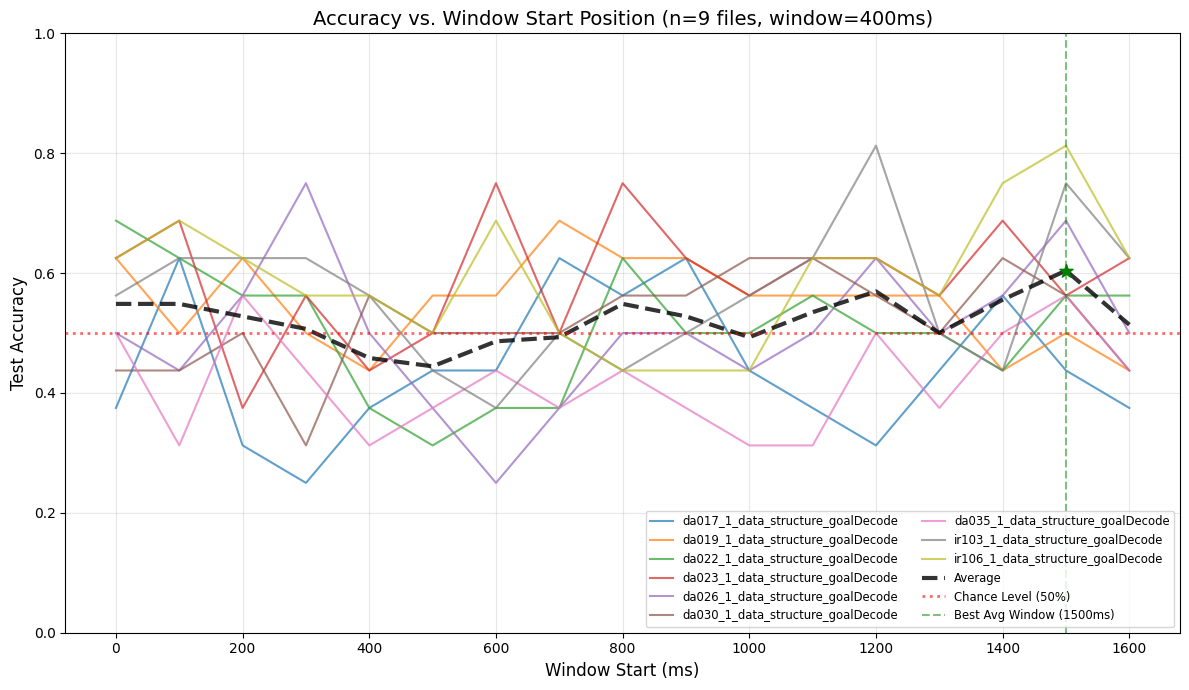


STATISTICAL SUMMARY
Total windows tested: 17
Bonferroni-corrected significance threshold: p < 0.0029

Best average window: 1500ms with accuracy: 0.604
P-value at best window: 0.0163
Overall average accuracy: 0.521
Accuracy range: 0.444 - 0.604

⚠ No windows reached significance after Bonferroni correction
   Windows with uncorrected p < 0.05:
  Window 1500ms: accuracy = 0.604, p = 0.0163


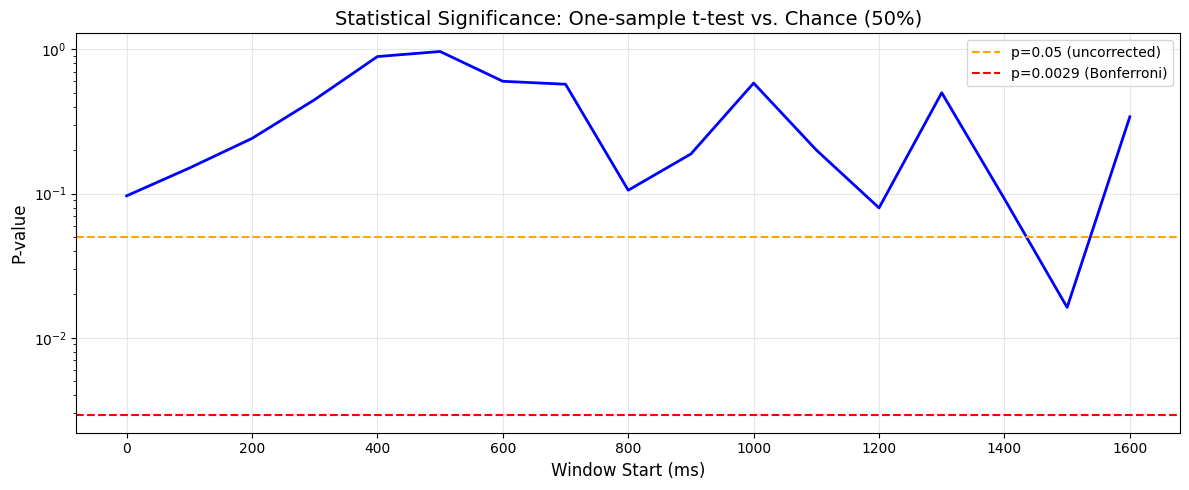

In [111]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

print(len(accuracy_curves))
print(accuracy_curves.keys())

# Plot all accuracy curves
plt.figure(figsize=(12, 7))

# Plot individual file curves
for file_name, data in accuracy_curves.items():
    plt.plot(data['window_starts'], data['accuracies'], label=file_name, alpha=0.7)

# Calculate average accuracy and perform statistical tests
all_window_starts = list(accuracy_curves.values())[0]['window_starts']
avg_accuracies = []
p_values = []
significant_windows = []

for i in range(len(all_window_starts)):
    accs_at_window = [data['accuracies'][i] for data in accuracy_curves.values()]
    avg_accuracies.append(np.mean(accs_at_window))

    # One-sample t-test: test if mean accuracy is significantly > 0.5
    t_stat, p_val = stats.ttest_1samp(accs_at_window, 0.5, alternative='greater')
    p_values.append(p_val)

    # Mark as significant if p < 0.05 (Bonferroni corrected)
    bonferroni_threshold = 0.05 / len(all_window_starts)
    if p_val < bonferroni_threshold:
        significant_windows.append(all_window_starts[i])

# Plot average line
plt.plot(all_window_starts, avg_accuracies, 'k--', linewidth=3, label='Average', alpha=0.8)

# Highlight significant windows
if significant_windows:
    sig_accuracies = [avg_accuracies[all_window_starts.index(w)] for w in significant_windows]
    plt.scatter(significant_windows, sig_accuracies, color='red', s=100,
                marker='o', zorder=5, label=f'Significant (p<{bonferroni_threshold:.4f})',
                edgecolors='darkred', linewidths=2)

# Add chance level line
plt.axhline(y=0.5, color='r', linestyle=':', linewidth=2, label='Chance Level (50%)', alpha=0.6)

# Find best average accuracy
best_avg_idx = np.argmax(avg_accuracies)
best_window = all_window_starts[best_avg_idx]
best_acc = avg_accuracies[best_avg_idx]
plt.axvline(x=best_window, color='g', linestyle='--', alpha=0.5,
            label=f'Best Avg Window ({best_window}ms)')
plt.scatter([best_window], [best_acc], color='green', s=100, zorder=5, marker='*')

# Labels and formatting
plt.xlabel('Window Start (ms)', fontsize=12)
plt.ylabel('Test Accuracy', fontsize=12)
plt.title(f'Accuracy vs. Window Start Position (n={len(accuracy_curves)} files, window={window_size_ms}ms)',
          fontsize=14)
plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()

plt.savefig("accuracy_vs_window_all_files.png", dpi=300, bbox_inches='tight')
plt.show()

# Print summary statistics
print(f"\n{'='*60}")
print(f"STATISTICAL SUMMARY")
print(f"{'='*60}")
print(f"Total windows tested: {len(all_window_starts)}")
print(f"Bonferroni-corrected significance threshold: p < {0.05/len(all_window_starts):.4f}")
print(f"\nBest average window: {best_window}ms with accuracy: {best_acc:.3f}")
print(f"P-value at best window: {p_values[best_avg_idx]:.4f}")
print(f"Overall average accuracy: {np.mean(avg_accuracies):.3f}")
print(f"Accuracy range: {np.min(avg_accuracies):.3f} - {np.max(avg_accuracies):.3f}")

if significant_windows:
    print(f"\n{'='*60}")
    print(f"SIGNIFICANT WINDOWS (better than chance, Bonferroni-corrected):")
    print(f"{'='*60}")
    for w in significant_windows:
        idx = all_window_starts.index(w)
        print(f"  Window {w}ms: accuracy = {avg_accuracies[idx]:.3f}, p = {p_values[idx]:.6f}")
else:
    print(f"\n⚠ No windows reached significance after Bonferroni correction")
    print(f"   Windows with uncorrected p < 0.05:")
    for i, (w, p) in enumerate(zip(all_window_starts, p_values)):
        if p < 0.05:
            print(f"  Window {w}ms: accuracy = {avg_accuracies[i]:.3f}, p = {p:.4f}")

# Optional: Create a second plot showing p-values
plt.figure(figsize=(12, 5))
plt.plot(all_window_starts, p_values, 'b-', linewidth=2)
plt.axhline(y=0.05, color='orange', linestyle='--', label='p=0.05 (uncorrected)')
plt.axhline(y=0.05/len(all_window_starts), color='red', linestyle='--',
            label=f'p={0.05/len(all_window_starts):.4f} (Bonferroni)')
plt.xlabel('Window Start (ms)', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.title('Statistical Significance: One-sample t-test vs. Chance (50%)', fontsize=14)
plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale makes it easier to see small p-values
plt.tight_layout()
plt.savefig("p_values_vs_window.png", dpi=300, bbox_inches='tight')
plt.show()

Figures will be saved to: C:/Users/mgeva/Documents/GitHub/memMaze-code/figures
Files in this directory: []

Number of files: 9
Files: ['da017_1_data_structure_goalDecode', 'da019_1_data_structure_goalDecode', 'da022_1_data_structure_goalDecode', 'da023_1_data_structure_goalDecode', 'da026_1_data_structure_goalDecode', 'da030_1_data_structure_goalDecode', 'da035_1_data_structure_goalDecode', 'ir103_1_data_structure_goalDecode', 'ir106_1_data_structure_goalDecode']


NameError: name 'figure_dir' is not defined

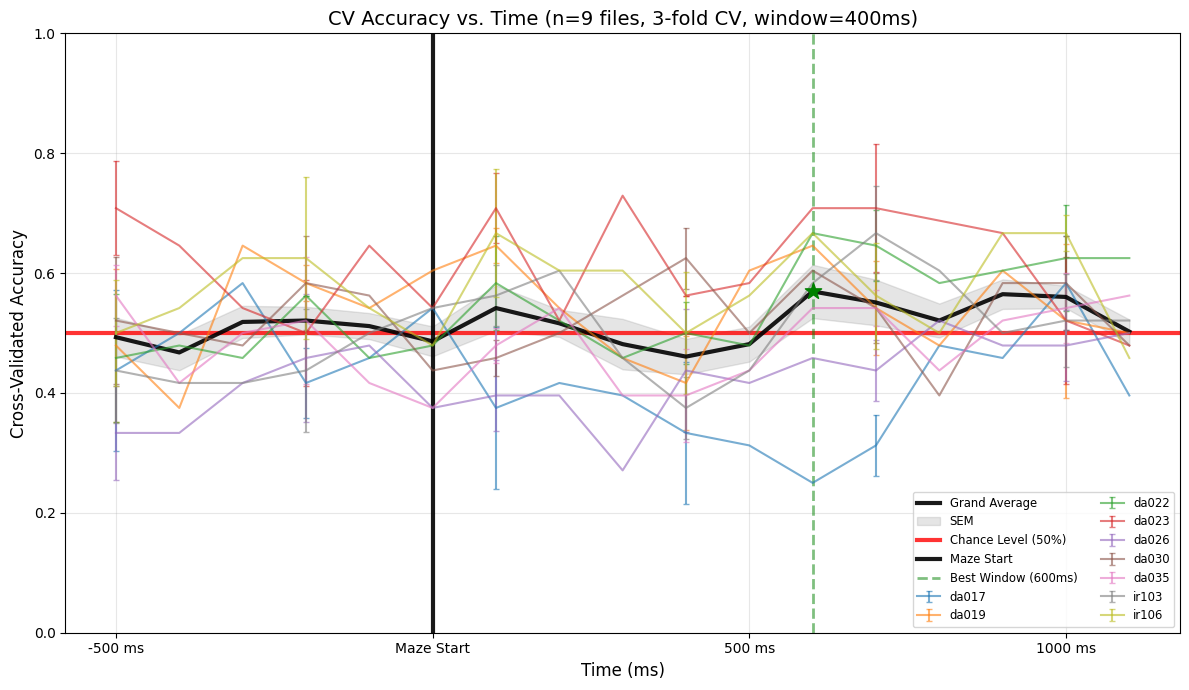

In [121]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import os

# Check where figures will be saved
# Define your figure folder at the top of your plotting code
figure_folder = 'C:/Users/mgeva/Documents/GitHub/memMaze-code/figures'  # or use full path like 'E:/MAZE/figures'
# Create the folder if it doesn't exist
os.makedirs(figure_folder, exist_ok=True)
print(f"Figures will be saved to: {figure_folder}")
print(f"Files in this directory: {os.listdir(figure_folder)[:10]}")  # Show first 10 files

print(f"\nNumber of files: {len(accuracy_curves)}")
print(f"Files: {list(accuracy_curves.keys())}")

# Plot all accuracy curves with error bars
plt.figure(figsize=(12, 7))

# Plot individual file curves with error bars (shortened names)
for file_name, data in accuracy_curves.items():
    short_name = file_name[:5]  # Only first 5 characters
    # Shift x-axis by -500ms
    shifted_starts = [x - 500 for x in data['window_starts']]
    plt.errorbar(shifted_starts, data['mean_accuracies'],
                 yerr=data['std_accuracies'], label=short_name,
                 alpha=0.6, capsize=2, errorevery=3)

# Calculate average accuracy across files and perform statistical tests
all_window_starts = list(accuracy_curves.values())[0]['window_starts']
avg_accuracies = []
std_accuracies = []
p_values = []
significant_windows = []

for i in range(len(all_window_starts)):
    # Collect mean accuracies from each file at this window
    mean_accs_at_window = [data['mean_accuracies'][i] for data in accuracy_curves.values()]

    # Average of the CV means across files
    avg_accuracies.append(np.mean(mean_accs_at_window))
    std_accuracies.append(np.std(mean_accs_at_window))

    # One-sample t-test: test if mean accuracy across files is significantly > 0.5
    t_stat, p_val = stats.ttest_1samp(mean_accs_at_window, 0.5, alternative='greater')
    p_values.append(p_val)

    # Mark as significant if p < 0.05 (Bonferroni corrected)
    bonferroni_threshold = 0.05 / len(all_window_starts)
    if p_val < bonferroni_threshold:
        significant_windows.append(all_window_starts[i])

# Shift x-axis by -500ms for plotting
shifted_window_starts = [x - 500 for x in all_window_starts]

# Plot average line with shaded standard error
plt.plot(shifted_window_starts, avg_accuracies, 'k-', linewidth=3, label='Grand Average', alpha=0.9)

# Add shaded region for standard error of the mean
sem = np.array(std_accuracies) / np.sqrt(len(accuracy_curves))
plt.fill_between(shifted_window_starts,
                 np.array(avg_accuracies) - sem,
                 np.array(avg_accuracies) + sem,
                 alpha=0.2, color='gray', label='SEM')

# Highlight significant windows
if significant_windows:
    shifted_sig_windows = [x - 500 for x in significant_windows]
    sig_accuracies = [avg_accuracies[all_window_starts.index(w)] for w in significant_windows]
    plt.scatter(shifted_sig_windows, sig_accuracies, color='red', s=100,
                marker='o', zorder=5, label=f'Significant (p<{bonferroni_threshold:.4f})',
                edgecolors='darkred', linewidths=2)

# Add chance level line - MORE VISIBLE
plt.axhline(y=0.5, color='red', linestyle='-', linewidth=3,
            label='Chance Level (50%)', alpha=0.8, zorder=1)

# Add black vertical line at maze start (500ms original = 0ms shifted)
plt.axvline(x=0, color='black', linestyle='-', linewidth=3,
            label='Maze Start', alpha=0.9, zorder=2)

# Find best average accuracy
best_avg_idx = np.argmax(avg_accuracies)
best_window = all_window_starts[best_avg_idx]
best_window_shifted = best_window - 500
best_acc = avg_accuracies[best_avg_idx]
plt.axvline(x=best_window_shifted, color='green', linestyle='--', alpha=0.5, linewidth=2,
            label=f'Best Window ({best_window_shifted}ms)')
plt.scatter([best_window_shifted], [best_acc], color='green', s=150, zorder=5, marker='*')

# Labels and formatting
plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('Cross-Validated Accuracy', fontsize=12)
plt.title(f'CV Accuracy vs. Time (n={len(accuracy_curves)} files, {n_folds}-fold CV, window={window_size_ms}ms)',
          fontsize=14)

# Custom x-axis labels
ax = plt.gca()
# Get current x-axis limits
xlim = ax.get_xlim()

# Set specific tick positions and labels
tick_positions = [-500, 0, 500, 1000, 1500]
tick_labels = ['-500 ms', 'Maze Start', '500 ms', '1000 ms', '1500 ms']

# Filter ticks that are within the plot range
valid_ticks = [(pos, label) for pos, label in zip(tick_positions, tick_labels)
               if xlim[0] <= pos <= xlim[1]]
if valid_ticks:
    positions, labels = zip(*valid_ticks)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

plt.legend(loc='lower right', fontsize='small', ncol=2)
plt.grid(True, alpha=0.3)
plt.ylim([0, 1])
plt.tight_layout()

save_path = os.path.join(figure_dir, "accuracy_vs_window_cv.png")

plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"\n✓ Saved: {os.path.abspath(save_path)}")
plt.show()

# Print summary statistics (with shifted times)
print(f"\n{'='*60}")
print(f"STATISTICAL SUMMARY (Cross-Validation Results)")
print(f"{'='*60}")
print(f"Number of files: {len(accuracy_curves)}")
print(f"CV folds per file: {n_folds}")
print(f"Total windows tested: {len(all_window_starts)}")
print(f"Bonferroni-corrected significance threshold: p < {0.05/len(all_window_starts):.6f}")
print(f"\nBest average window: {best_window_shifted}ms (relative to maze start)")
print(f"  Accuracy: {best_acc:.3f} ± {std_accuracies[best_avg_idx]:.3f} (across files)")
print(f"  P-value: {p_values[best_avg_idx]:.6f}")
print(f"\nOverall statistics:")
print(f"  Mean accuracy: {np.mean(avg_accuracies):.3f}")
print(f"  Accuracy range: {np.min(avg_accuracies):.3f} - {np.max(avg_accuracies):.3f}")

if significant_windows:
    print(f"\n{'='*60}")
    print(f"SIGNIFICANT WINDOWS (better than chance, Bonferroni-corrected):")
    print(f"{'='*60}")
    for w in significant_windows:
        idx = all_window_starts.index(w)
        w_shifted = w - 500
        print(f"  Window {w_shifted}ms to {w_shifted+window_size_ms}ms (relative to maze start):")
        print(f"    Accuracy: {avg_accuracies[idx]:.3f} ± {std_accuracies[idx]:.3f}")
        print(f"    P-value: {p_values[idx]:.6f}")
else:
    print(f"\n⚠ No windows reached significance after Bonferroni correction")
    print(f"\n   Windows with uncorrected p < 0.05:")
    uncorrected_sig = []
    for i, (w, p) in enumerate(zip(all_window_starts, p_values)):
        if p < 0.05:
            uncorrected_sig.append((w, avg_accuracies[i], p))

    if uncorrected_sig:
        for w, acc, p in uncorrected_sig:
            w_shifted = w - 500
            print(f"  Window {w_shifted}ms: accuracy = {acc:.3f}, p = {p:.4f}")
    else:
        print("  None found.")

# Create a second plot showing p-values
plt.figure(figsize=(12, 5))
plt.plot(shifted_window_starts, p_values, 'b-', linewidth=2, label='P-values')
plt.axhline(y=0.05, color='orange', linestyle='--', linewidth=2, label='p=0.05 (uncorrected)')
plt.axhline(y=0.05/len(all_window_starts), color='red', linestyle='--', linewidth=2,
            label=f'p={0.05/len(all_window_starts):.6f} (Bonferroni)')

# Add maze start line
plt.axvline(x=0, color='black', linestyle='-', linewidth=2,
            label='Maze Start', alpha=0.7)

# Highlight significant regions
if significant_windows:
    shifted_sig_windows = [x - 500 for x in significant_windows]
    for w_shifted, w in zip(shifted_sig_windows, significant_windows):
        idx = all_window_starts.index(w)
        plt.scatter([w_shifted], [p_values[idx]], color='red', s=100, zorder=5,
                   edgecolors='darkred', linewidths=2)

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('P-value', fontsize=12)
plt.title('Statistical Significance: One-sample t-test vs. Chance (50%)', fontsize=14)

# Custom x-axis labels for p-value plot
ax = plt.gca()
xlim = ax.get_xlim()
valid_ticks = [(pos, label) for pos, label in zip(tick_positions, tick_labels)
               if xlim[0] <= pos <= xlim[1]]
if valid_ticks:
    positions, labels = zip(*valid_ticks)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

plt.legend()
plt.grid(True, alpha=0.3)
plt.yscale('log')
plt.tight_layout()

save_path = os.path.join(figure_dir, "p_values_vs_window_cv.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {os.path.abspath(save_path)}")
plt.show()

# Additional: Plot showing within-file variability (CV std)
plt.figure(figsize=(12, 6))
for file_name, data in accuracy_curves.items():
    short_name = file_name[:5]  # Only first 5 characters
    shifted_starts = [x - 500 for x in data['window_starts']]
    plt.plot(shifted_starts, data['std_accuracies'], label=short_name, alpha=0.7)

# Add maze start line
plt.axvline(x=0, color='black', linestyle='-', linewidth=2,
            label='Maze Start', alpha=0.7)

plt.xlabel('Time (ms)', fontsize=12)
plt.ylabel('CV Standard Deviation', fontsize=12)
plt.title(f'Within-File Classification Stability ({n_folds}-fold CV)', fontsize=14)

# Custom x-axis labels
ax = plt.gca()
xlim = ax.get_xlim()
valid_ticks = [(pos, label) for pos, label in zip(tick_positions, tick_labels)
               if xlim[0] <= pos <= xlim[1]]
if valid_ticks:
    positions, labels = zip(*valid_ticks)
    ax.set_xticks(positions)
    ax.set_xticklabels(labels)

plt.legend(loc='upper right', fontsize='small', ncol=2)
plt.grid(True, alpha=0.3)
plt.tight_layout()

save_path = os.path.join(figure_dir, "cv_stability_per_file.png")
plt.savefig(save_path, dpi=300, bbox_inches='tight')
print(f"✓ Saved: {os.path.abspath(save_path)}")
plt.show()

print(f"\n{'='*60}")
print(f"All figures saved to: {current_dir}")
print(f"{'='*60}")